In [1]:
# pre-code

#import useful libraries
import random
from random import randint
import numpy as np
import matplotlib.pyplot as plt

# fix seed for consistency
random.seed(42)

STD_DICE = [1,2,3,4,5,6]

In [2]:
class Board:

    def __init__(self, ladders, dice):
        self.board_size = len(ladders)
        self.ladders = ladders
        self.end_position =  self.board_size - 1
        self.dice = dice
        self.dice_size = len(dice)
        self.all_moves = self.get_moves()
        pass


    def __repr__(self):
        ret = "Size: " + str(self.board_size) + "\n"
        ret += "Ladders: " + str(self.ladders) + "\n"

        ptr = 0
        for position_moves in self.all_moves:    
            ret += "Moves " + str(ptr) + ": " + str(position_moves) + "\n"
            ptr += 1

        return ret


    def one_move(self, position, dice_roll):
        next_position = -1

        if position + dice_roll <= self.end_position:
            next_position = position + dice_roll
        else:
            next_position = 2 * self.end_position - position - dice_roll

        if self.ladders[next_position] != -1:
            next_position = self.ladders[next_position]
            
        return next_position
    

    def get_moves(self):
        moves = []

        for position in range(0, self.board_size - 1):
            position_moves = []
            for dice_roll in self.dice:
                position_moves.append(self.one_move(position, dice_roll)) 
            moves.append(position_moves)

        return moves

In [3]:
#one game simulation
def simulate_one_game(board):
    position = 0
    turns = 0

    while position != board.end_position:
        print("You are now at position {}.".format(position))
        rnd_index = randint(0, len(board.dice) - 1)
        dice_roll = board.dice[rnd_index]
        print("You rolled a {}.".format(dice_roll))
        position = board.one_move(position, dice_roll)
        turns += 1

    print("You are now at position {}.".format(position))
    print("You win after {} turns.".format(turns))
    return turns

In [4]:
# sample board of size 9 (0~8) 
# 0:Start, 8:End
# a ladder from 3 to 5
# a snake from 6 to 2 

ladders_1 = [-1] * 9
ladders_1[3] = 5
ladders_1[6] = 2 
board_1 = Board(ladders_1, STD_DICE)
print(board_1)

Size: 9
Ladders: [-1, -1, -1, 5, -1, -1, 2, -1, -1]
Moves 0: [1, 2, 5, 4, 5, 2]
Moves 1: [2, 5, 4, 5, 2, 7]
Moves 2: [5, 4, 5, 2, 7, 8]
Moves 3: [4, 5, 2, 7, 8, 7]
Moves 4: [5, 2, 7, 8, 7, 2]
Moves 5: [2, 7, 8, 7, 2, 5]
Moves 6: [7, 8, 7, 2, 5, 4]
Moves 7: [8, 7, 2, 5, 4, 5]



In [5]:
simulate_one_game(board_1)
#print(board_1.all_moves)

You are now at position 0.
You rolled a 6.
You are now at position 2.
You rolled a 1.
You are now at position 5.
You rolled a 1.
You are now at position 2.
You rolled a 6.
You are now at position 8.
You win after 4 turns.


4

In [6]:
def calc_expected(board):
    size = board.board_size
    A = np.zeros((size,size))

    for position in range(0,size - 1):
        A[position][position] += 1
        for next_position in board.all_moves[position]:
            A[position][next_position] -= 1/board.dice_size
    
    A[size - 1][size - 1] += 1

    inv_A = np.linalg.inv(A)
    X = np.ones(size)
    X[size - 1] = 0
    return np.matmul(inv_A, X)

In [7]:
# Simple validation testcase
ladders_2 = [-1] * 3
board_2 = Board(ladders_2, [1, 2])
print(calc_expected(board_2))

[2. 2. 0.]


The cell below is to create the snake and ladder board

In [8]:
# Standard snake and ladder board
STD_ladders = [-1] * 101
STD_ladders[1] = 38
STD_ladders[4] = 14
STD_ladders[9] = 31
STD_ladders[17] = 7
STD_ladders[21] = 42
STD_ladders[28] = 84
STD_ladders[51] = 67
STD_ladders[54] = 34
STD_ladders[62] = 19
STD_ladders[64] = 60
STD_ladders[72] = 91
STD_ladders[80] = 100
STD_ladders[87] = 36
STD_ladders[93] = 73
STD_ladders[95] = 75
STD_ladders[98] = 79
STD_board = Board(STD_ladders, STD_DICE)

In [9]:
# print the number of expected moves to win starting at position i
print(calc_expected(STD_board))
std_board_expected = calc_expected(STD_board)
index = []
for i in range (len(std_board_expected)):
    index.append(i)

[38.55513258 39.39602702 39.21798303 38.65119855 38.83176359 38.71527307
 38.55427856 38.36212094 38.14971909 38.3087432  37.95869816 38.01632998
 37.58831146 37.20917525 36.87530795 36.2046364  35.85842791 35.14343821
 35.0202003  34.93435799 34.87210416 35.26275721 33.78117694 34.07218274
 34.28077286 34.41930412 34.49858118 34.52452545 36.10631983 35.81821753
 35.53231358 35.25049172 34.97424352 34.68019108 34.38246158 34.08960368
 33.81688989 33.55956055 33.31675432 32.91587647 32.59608455 32.33245632
 32.18060712 32.01558454 31.85991693 30.51060935 30.67733302 30.75068696
 31.26951191 31.02544908 30.92591127 32.0975473  31.67767507 31.19081058
 30.03400233 29.56107213 30.32868439 29.44458002 29.15844175 28.2696236
 27.44161209 26.72349092 24.55345375 24.13995379 23.16137964 22.9367147
 22.47354307 22.41476386 21.91413496 21.65895405 21.5701672  21.58872506
 21.99897591 22.06208855 18.91036161 20.1278686  21.03744609 21.70007221
 22.15601837 22.44076442 26.36891392 27.43291049 26.4

In [10]:
grid = np.zeros((10,10))
cnt = 0
for i in range(10):
    for j in range(10):
        grid[i][j] = std_board_expected[cnt]
        cnt += 1

In [11]:
print(grid)

[[38.55513258 39.39602702 39.21798303 38.65119855 38.83176359 38.71527307
  38.55427856 38.36212094 38.14971909 38.3087432 ]
 [37.95869816 38.01632998 37.58831146 37.20917525 36.87530795 36.2046364
  35.85842791 35.14343821 35.0202003  34.93435799]
 [34.87210416 35.26275721 33.78117694 34.07218274 34.28077286 34.41930412
  34.49858118 34.52452545 36.10631983 35.81821753]
 [35.53231358 35.25049172 34.97424352 34.68019108 34.38246158 34.08960368
  33.81688989 33.55956055 33.31675432 32.91587647]
 [32.59608455 32.33245632 32.18060712 32.01558454 31.85991693 30.51060935
  30.67733302 30.75068696 31.26951191 31.02544908]
 [30.92591127 32.0975473  31.67767507 31.19081058 30.03400233 29.56107213
  30.32868439 29.44458002 29.15844175 28.2696236 ]
 [27.44161209 26.72349092 24.55345375 24.13995379 23.16137964 22.9367147
  22.47354307 22.41476386 21.91413496 21.65895405]
 [21.5701672  21.58872506 21.99897591 22.06208855 18.91036161 20.1278686
  21.03744609 21.70007221 22.15601837 22.44076442]
 [2

Given a snake and ladder board, the graph and heatmp below will plot the expected moves to win at position x.

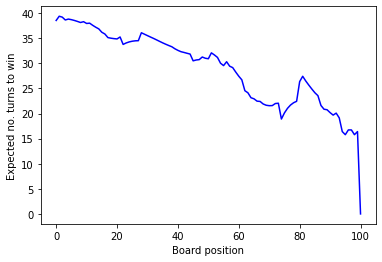

In [12]:
plt.plot(index, std_board_expected, color="blue")
plt.xlabel("Board position")
plt.ylabel("Expected no. turns to win")
plt.show()

<AxesSubplot:>

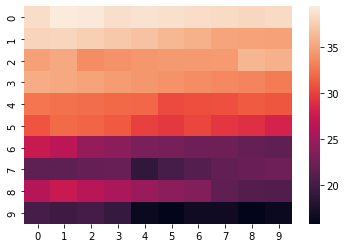

In [13]:
import seaborn as sb
sb.heatmap(grid)

The function call below will simulate a single game

In [13]:
simulate_one_game(STD_board)

You are now at position 0.
You rolled a 3.
You are now at position 3.
You rolled a 2.
You are now at position 5.
You rolled a 2.
You are now at position 7.
You rolled a 2.
You are now at position 31.
You rolled a 6.
You are now at position 37.
You rolled a 1.
You are now at position 38.
You rolled a 6.
You are now at position 44.
You rolled a 6.
You are now at position 50.
You rolled a 5.
You are now at position 55.
You rolled a 1.
You are now at position 56.
You rolled a 5.
You are now at position 61.
You rolled a 4.
You are now at position 65.
You rolled a 1.
You are now at position 66.
You rolled a 1.
You are now at position 67.
You rolled a 1.
You are now at position 68.
You rolled a 2.
You are now at position 70.
You rolled a 2.
You are now at position 91.
You rolled a 5.
You are now at position 96.
You rolled a 5.
You are now at position 99.
You rolled a 1.
You are now at position 100.
You win after 20 turns.


20